### question 7

In [ ]:
## import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.utils import shuffle

## import iris dataset
iris = datasets.load_iris()
x = iris.data
y = iris.target

In [5]:
## import iris dataset
iris = datasets.load_iris()
x = iris.data
y = iris.target

In [26]:
## select data for q7
x_q7 = x[:,[1,3]][np.where(y!=2)]
y_q7 = y[np.where(y!=2)]

## set 0 labels equal to -1
y_q7[y_q7 == 0] = -1

## select data for q8
x_q8 = x[:,[0,2]]
y_q8 = y[np.where(y!=0)]


In [56]:
'''
create binary_perceptron function
takes as input parameters w, b of a linear classifier as well as a data point
x, and returns the label for that point: sign(w · x + b). The label is either +1 or -1.
'''
def binary_peceptron(w, b, x):
    if np.dot(w, x) + b >= 0:
        label = 1
    else:
        label = -1
    return(label)
    
'''
create fit_binary_perceptron function
takes as input an array of data points and an array of labels (where each
label is +1 or -1), and runs the Perceptron algorithm to learn a linear classifier w, b. The
algorithm should begin by randomly permuting the data points.
'''
def fit_binary_perceptron(x, y, track_updates, set_seed):
    if set_seed:
        x, y = shuffle(x, y,random_state=42)
    else:
        x, y = shuffle(x, y)
    w = np.zeros(x.shape[1])
    b = 0
    updates = 0
    max_updates = 1000

    def make_prediction(w, b, x, y, updates):
        error = False    
        for xi, yi in zip(x, y):
            if binary_perceptron(w, b, xi) != yi:
                w += yi * xi
                b += yi
                updates += 1
                error = True  
        if updates <= max_updates:
            if error:
                return make_prediction(w, b, x, y, updates) 
            else:
                return (w, b, updates)
        else:
            print("Did not converge after {max_iterations} iterations")
    if track_updates:
        w, b, updates = make_prediction(w, b, x, y, updates)
        return (w, b, updates)
    else:
        w, b, updates = make_prediction(w, b, x, y, updates)
        return (w, b)


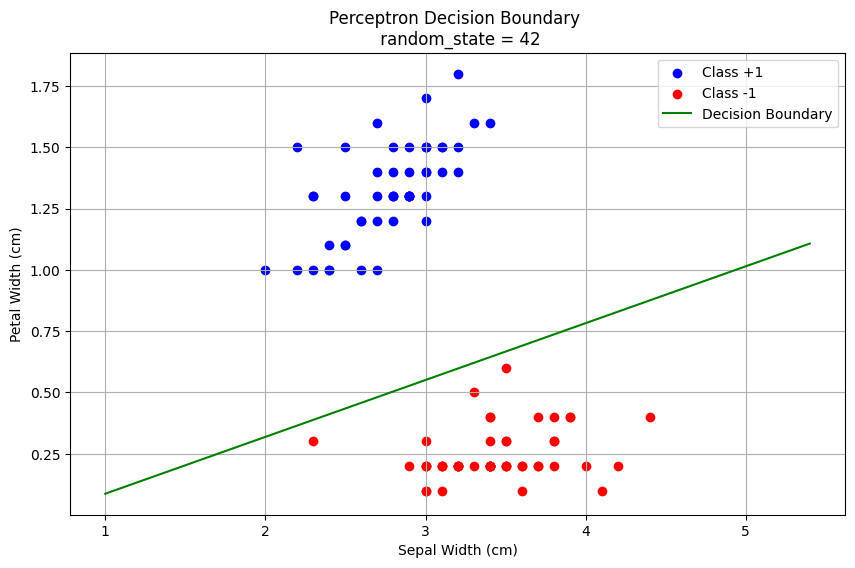

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


<Figure size 640x480 with 0 Axes>

In [ ]:
## plot results
def plot_decision_boundary(X, y, w, b):
    """
    Plot the data points and the decision boundary.
    
    Parameters:
    X (numpy.ndarray): Array of data points (n_samples, 2)
    y (numpy.ndarray): Array of labels
    w (numpy.ndarray): Weight vector
    b (float): Bias term
    """
    # Create a figure
    plt.figure(figsize=(10, 6))
    
    # Plot the data points
    plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', label='Class +1')
    plt.scatter(X[y == -1, 0], X[y == -1, 1], color='red', label='Class -1')
    
    # Plot the decision boundary
    # The decision boundary is where w·x + b = 0
    # For 2D data, we can express this as x2 = (-w1*x1 - b) / w2
    
    # Get the min and max of x1
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    
    # Calculate corresponding x2 values for the decision boundary
    x2_boundary = lambda x1: (-w[0] * x1 - b) / w[1]
    
    # Create points for the line
    x1_points = np.array([x1_min, x1_max])
    x2_points = np.array([x2_boundary(x1_min), x2_boundary(x1_max)])
    
    # Plot the decision boundary
    plt.plot(x1_points, x2_points, 'g-', label='Decision Boundary')
    
    # Add labels and legend
    plt.xlabel('Sepal Width (cm)')
    plt.ylabel('Petal Width (cm)')
    plt.title('Perceptron Decision Boundary \n random_state = 42')
    plt.legend()
    plt.grid(True)
    plt.show()
    # Save the figure
    plt.savefig('hw6_q7_c.png')

w, b, updates = fit_binary_perceptron(x_q7, y_q7, track_updates=True, set_seed=True)

plot_decision_boundary(x_q7, y_q7, w, b)
update_list = []
for i in range(20):
    w, b, updates = fit_binary_perceptron(x_q7, y_q7, track_updates=True, set_seed=False)
    update_list.append(updates)
    
    

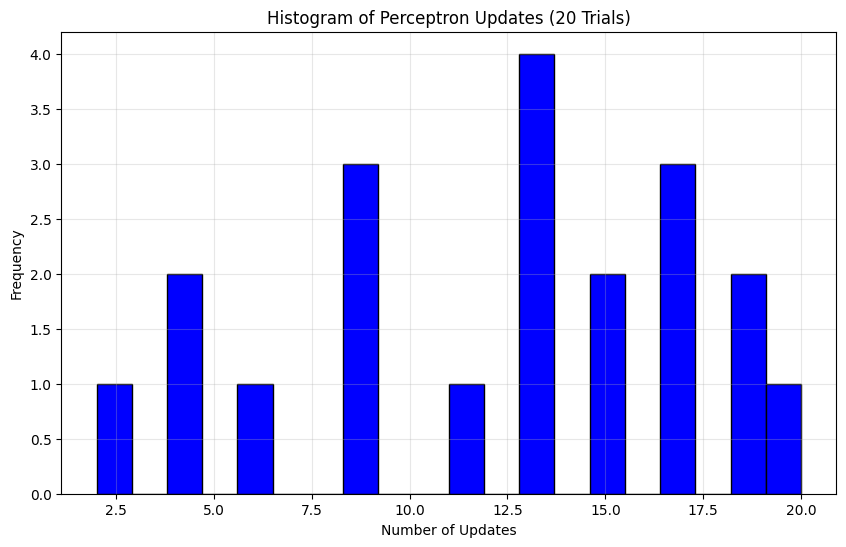

In [76]:
def plot_updates_histogram(updates_list):
    """
    Plot a histogram of the number of updates made by the Perceptron algorithm.
    
    Parameters:
    updates_list (list): List of update counts
    """
    plt.figure(figsize=(10, 6))
    plt.hist(updates_list, bins=20, color='blue', edgecolor='black')
    plt.xlabel('Number of Updates')
    plt.ylabel('Frequency')
    #plt.xticks([i for i in range(20)])
    plt.title('Histogram of Perceptron Updates (20 Trials)')
    plt.grid(True, alpha=0.3)
    plt.savefig('hw6_q7_d.png')
    plt.show()

update_list = []
for i in range(20):
    w, b, updates = fit_binary_perceptron(x_q7, y_q7, track_updates=True, set_seed=False)
    update_list.append(updates)

plot_updates_histogram(update_list)

In [ ]:
'''
create binary_perceptron function
takes as input parameters w, b of a linear classifier as well as a data point
x, and returns the label for that point: sign(w · x + b). The label is either +1 or -1.
'''
def binary_peceptron(w, b, x):
    if np.dot(w, x) + b >= 0:
        label = 1
    else:
        label = -1
    return(label)
    
'''
create fit_binary_perceptron function
takes as input an array of data points and an array of labels (where each
label is +1 or -1), and runs the Perceptron algorithm to learn a linear classifier w, b. The
algorithm should begin by randomly permuting the data points.
'''
def fit_binary_perceptron(x, y, track_updates):
    x, y = shuffle(x, y,random_state=42)
    w = np.zeros(x.shape[1])
    b = 0
    updates = 0
    max_updates = 1000

    def make_prediction(w, b, x, y, updates):
        error = False    
        for xi, yi in zip(x, y):
            if binary_perceptron(w, b, xi) != yi:
                w += yi * xi
                b += yi
                updates += 1
                error = True  
        if updates <= max_updates:
            if error:
                return make_prediction(w, b, x, y, updates) 
            else:
                return (w, b, updates)
        else:
            print("Did not converge after {max_iterations} iterations")
    if track_updates:
        w, b, updates = make_prediction(w, b, x, y, updates)
        return (w, b, updates)
    else:
        w, b, updates = make_prediction(w, b, x, y, updates)
        return (w, b)

w,b = fit_binary_perceptron(x_q7,y_q7,track_updates=False)
print(f"decision boundary: {w}x + {b}")

decision boundary: [-1.6  6.9]x + 1


In [51]:
w,b,updates = fit_binary_perceptron(x_q7,y_q7,track_updates=True)
print(f"decision boundary: {w}x + {b}")
print(updates)

decision boundary: [-1.6  6.9]x + 1
13


Trained Perceptron with 17 updates
Weight vector: [-2.4  9.4]
Bias term: 1
Updates across 20 trials: [15, 13, 15, 23, 6, 2, 9, 15, 4, 25, 2, 13, 13, 15, 7, 27, 15, 27, 2, 15]
Average number of updates: 13.15
Standard deviation: 7.76


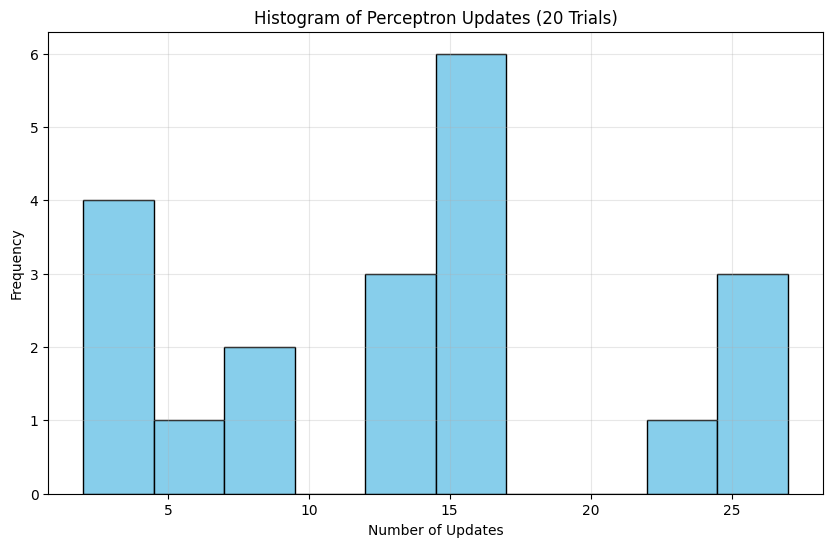

In [ ]:


def predict(w, b, x):
    """
    Predict the label for a data point using a linear classifier.
    
    Parameters:
    w (numpy.ndarray): Weight vector
    b (float): Bias term
    x (numpy.ndarray): Data point
    
    Returns:
    int: Predicted label (+1 or -1)
    """
    # Calculate the dot product w·x + b
    activation = np.dot(w, x) + b
    
    # Return the sign of the activation
    return 1 if activation >= 0 else -1

def perceptron_train(X, y, max_iterations=1000):
    """
    Train a binary Perceptron on the given data.
    
    Parameters:
    X (numpy.ndarray): Array of data points (n_samples, n_features)
    y (numpy.ndarray): Array of labels (+1 or -1)
    max_iterations (int): Maximum number of iterations through the dataset
    
    Returns:
    tuple: (w, b, updates) - weight vector, bias term, and number of updates made
    """
    # Get dimensions
    n_samples, n_features = X.shape
    
    # Initialize weights and bias
    w = np.zeros(n_features)
    b = 0
    
    # Counter for updates
    updates = 0
    
    # Training loop
    for _ in range(max_iterations):
        # Randomly permute the data
        X_shuffled, y_shuffled = shuffle(X, y)
        
        # Flag to check if any updates were made in this iteration
        made_update = False
        
        # Go through all data points
        for i in range(n_samples):
            # Get current point and label
            x_i = X_shuffled[i]
            y_i = y_shuffled[i]
            
            # Make prediction
            y_pred = predict(w, b, x_i)
            
            # Update if misclassified
            if y_pred != y_i:
                w = w + y_i * x_i
                b = b + y_i
                updates += 1
                made_update = True
        
        # If no updates were made in this iteration, we've converged
        if not made_update:
            break
    
    return w, b, updates

def plot_decision_boundary(X, y, w, b):
    """
    Plot the data points and the decision boundary.
    
    Parameters:
    X (numpy.ndarray): Array of data points (n_samples, 2)
    y (numpy.ndarray): Array of labels
    w (numpy.ndarray): Weight vector
    b (float): Bias term
    """
    # Create a figure
    plt.figure(figsize=(10, 6))
    
    # Plot the data points
    plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', label='Class +1')
    plt.scatter(X[y == -1, 0], X[y == -1, 1], color='red', label='Class -1')
    
    # Plot the decision boundary
    # The decision boundary is where w·x + b = 0
    # For 2D data, we can express this as x2 = (-w1*x1 - b) / w2
    
    # Get the min and max of x1
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    
    # Calculate corresponding x2 values for the decision boundary
    x2_boundary = lambda x1: (-w[0] * x1 - b) / w[1]
    
    # Create points for the line
    x1_points = np.array([x1_min, x1_max])
    x2_points = np.array([x2_boundary(x1_min), x2_boundary(x1_max)])
    
    # Plot the decision boundary
    plt.plot(x1_points, x2_points, 'g-', label='Decision Boundary')
    
    # Add labels and legend
    plt.xlabel('Sepal Width (cm)')
    plt.ylabel('Petal Width (cm)')
    plt.title('Perceptron Decision Boundary')
    plt.legend()
    plt.grid(True)
    
    # Save the figure
    plt.savefig('perceptron_decision_boundary.png')
    plt.close()

def run_multiple_trials(X, y, n_trials=20):
    """
    Run the Perceptron algorithm multiple times and track the number of updates.
    
    Parameters:
    X (numpy.ndarray): Array of data points
    y (numpy.ndarray): Array of labels
    n_trials (int): Number of trials to run
    
    Returns:
    list: Number of updates made in each trial
    """
    updates_list = []
    
    for _ in range(n_trials):
        _, _, updates = perceptron_train(X, y)
        updates_list.append(updates)
    
    return updates_list

def plot_updates_histogram(updates_list):
    """
    Plot a histogram of the number of updates made by the Perceptron algorithm.
    
    Parameters:
    updates_list (list): List of update counts
    """
    plt.figure(figsize=(10, 6))
    plt.hist(updates_list, bins=10, color='skyblue', edgecolor='black')
    plt.xlabel('Number of Updates')
    plt.ylabel('Frequency')
    plt.title('Histogram of Perceptron Updates (20 Trials)')
    plt.grid(True, alpha=0.3)
    plt.savefig('hw6_q7_d'.png')
    plt.show()

def main():
    # Load the Iris dataset
    iris = datasets.load_iris()
    X_full = iris.data
    y_full = iris.target
    
    # Restrict to features 1 and 3 (sepal width and petal width)
    X = X_full[:, [1, 3]]
    
    # Restrict to labels 0 and 1, and recode label 0 as -1
    mask = (y_full == 0) | (y_full == 1)
    X = X[mask]
    y = y_full[mask]
    y = np.where(y == 0, -1, 1)
    
    # Part (c): Train the Perceptron and plot the decision boundary
    w, b, updates = perceptron_train(X, y)
    print(f"Trained Perceptron with {updates} updates")
    print(f"Weight vector: {w}")
    print(f"Bias term: {b}")
    
    plot_decision_boundary(X, y, w, b)
    
    # Part (d): Run multiple trials and plot histogram
    updates_list = run_multiple_trials(X, y)
    print(f"Updates across 20 trials: {updates_list}")
    print(f"Average number of updates: {np.mean(updates_list):.2f}")
    print(f"Standard deviation: {np.std(updates_list):.2f}")
    
    plot_updates_histogram(updates_list)

main()

### question 8

Is the data linearly separable? No
Accuracy with hard margin SVM: 0.9300

C          Training Error       Support Vectors     
--------------------------------------------------
0.00       0.1700               100                 
0.01       0.1600               92                  
0.10       0.0700               56                  
1.00       0.0700               31                  
10.00      0.0500               18                  
100.00     0.0500               14                  
1000.00    0.0500               14                  
10000.00   0.0500               14                  
100000.00  0.0600               14                  
1000000.00 0.0700               13                  

Best C value based on training error: 10


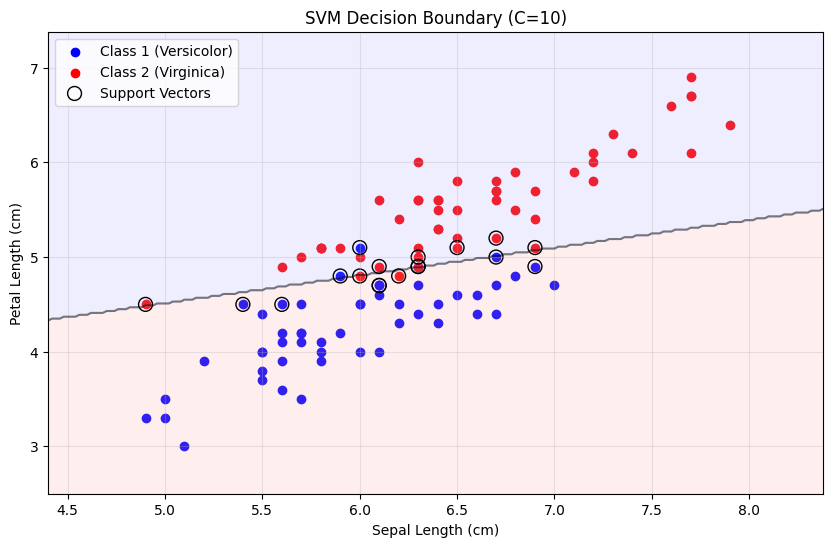

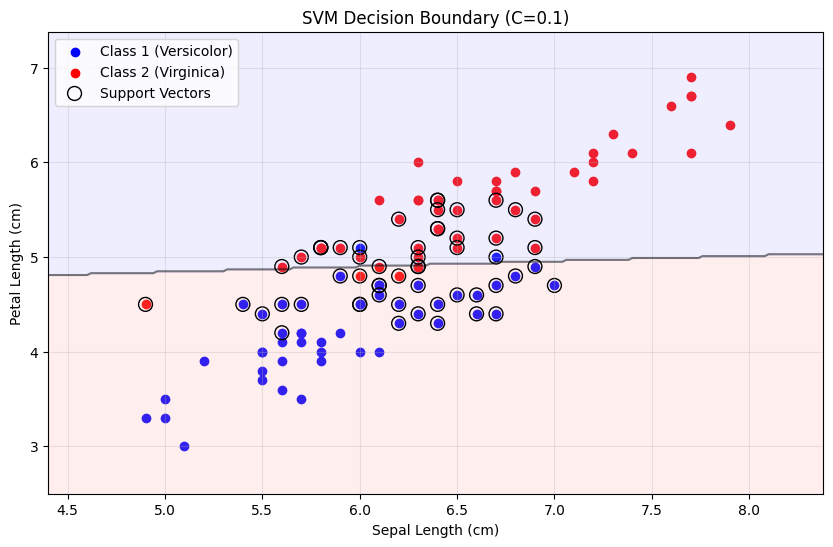

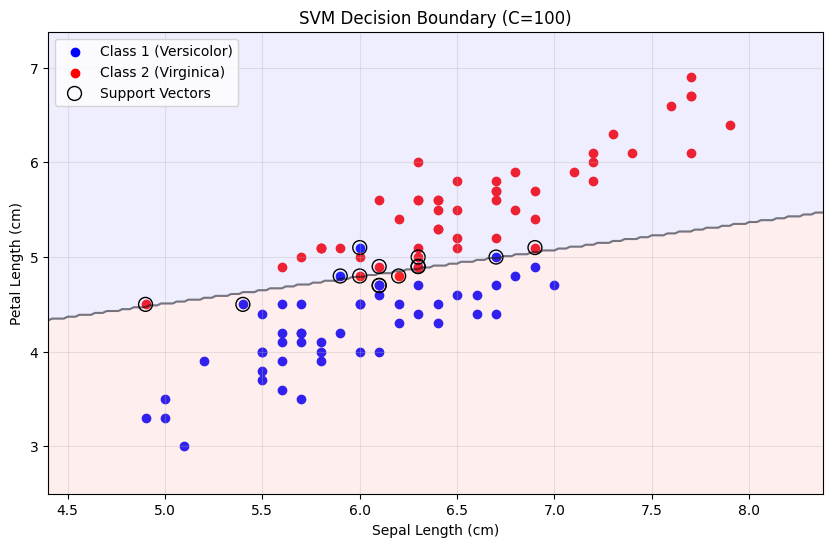

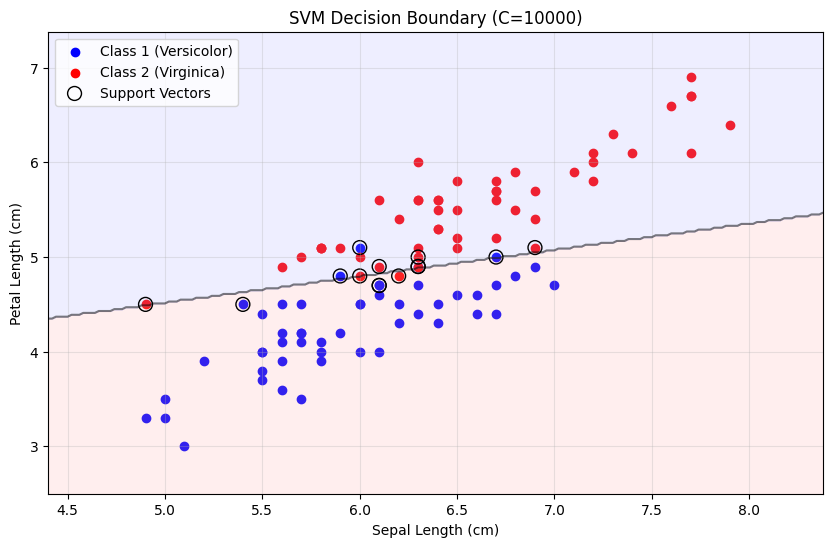

In [77]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def load_iris_data():
    """
    Load the Iris dataset and extract features 0 and 2, and labels 1,2.
    
    Returns:
    tuple: (X, y) - feature matrix and labels
    """
    # Load the Iris dataset
    iris = datasets.load_iris()
    X_full = iris.data
    y_full = iris.target
    
    # Restrict to features 0 and 2 (sepal length and petal length)
    X = X_full[:, [0, 2]]
    
    # Restrict to labels 1 and 2
    mask = (y_full == 1) | (y_full == 2)
    X = X[mask]
    y = y_full[mask]
    
    return X, y

def check_linear_separability(X, y):
    """
    Check if the data is linearly separable by training an SVM with a very large C value.
    
    Parameters:
    X (numpy.ndarray): Feature matrix
    y (numpy.ndarray): Labels
    
    Returns:
    bool: True if the data is linearly separable, False otherwise
    """
    # Train an SVM with a very large C value (hard margin)
    svm = SVC(kernel='linear', C=1e6)
    svm.fit(X, y)
    
    # Predict on the training data
    y_pred = svm.predict(X)
    
    # Calculate accuracy
    accuracy = accuracy_score(y, y_pred)
    
    # If accuracy is 1.0, the data is linearly separable
    return accuracy == 1.0, accuracy

def train_svm_with_different_c(X, y, c_values):
    """
    Train SVM models with different C values and record training error and number of support vectors.
    
    Parameters:
    X (numpy.ndarray): Feature matrix
    y (numpy.ndarray): Labels
    c_values (list): List of C values to try
    
    Returns:
    list: List of dictionaries containing C value, training error, and number of support vectors
    """
    results = []
    
    for c in c_values:
        # Train SVM with current C value
        svm = SVC(kernel='linear', C=c)
        svm.fit(X, y)
        
        # Predict on training data
        y_pred = svm.predict(X)
        
        # Calculate training error
        training_error = 1 - accuracy_score(y, y_pred)
        
        # Get number of support vectors
        n_support_vectors = svm.n_support_.sum()
        
        # Store results
        results.append({
            'C': c,
            'training_error': training_error,
            'n_support_vectors': n_support_vectors
        })
    
    return results

def plot_decision_boundary(X, y, c_value):
    """
    Plot the data points and the decision boundary for a specific C value.
    
    Parameters:
    X (numpy.ndarray): Feature matrix
    y (numpy.ndarray): Labels
    c_value (float): C value for the SVM
    
    Returns:
    None
    """
    # Train SVM with the specified C value
    svm = SVC(kernel='linear', C=c_value)
    svm.fit(X, y)
    
    # Create a figure
    plt.figure(figsize=(10, 6))
    
    # Plot the data points
    plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', label='Class 1 (Versicolor)')
    plt.scatter(X[y == 2, 0], X[y == 2, 1], color='red', label='Class 2 (Virginica)')
    
    # Create a mesh grid to plot the decision boundary
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    
    # Predict on the mesh grid
    Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot the decision boundary
    plt.contour(xx, yy, Z, colors='k', levels=[0.5, 1.5, 2.5], alpha=0.5,
                linestyles=['--', '-', '--'])
    
    # Fill the regions
    plt.contourf(xx, yy, Z, colors=['#FFAAAA', '#AAAAFF'], alpha=0.2, levels=[0, 1, 2, 3])
    
    # Highlight support vectors
    plt.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1],
                s=100, linewidth=1, facecolors='none', edgecolors='k', label='Support Vectors')
    
    # Add labels and legend
    plt.xlabel('Sepal Length (cm)')
    plt.ylabel('Petal Length (cm)')
    plt.title(f'SVM Decision Boundary (C={c_value})')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Save the figure
    #plt.savefig(f'svm_decision_boundary_C{c_value}.png')
    plt.show()

def print_results_table(results):
    """
    Print a table of results.
    
    Parameters:
    results (list): List of dictionaries containing C value, training error, and number of support vectors
    
    Returns:
    None
    """
    print("\n{:<10} {:<20} {:<20}".format('C', 'Training Error', 'Support Vectors'))
    print("-" * 50)
    for result in results:
        print("{:<10.2f} {:<20.4f} {:<20}".format(
            result['C'],
            result['training_error'],
            result['n_support_vectors']
        ))

def main():
    # Load the Iris dataset
    X, y = load_iris_data()
    
    # Part (a): Check if the data is linearly separable
    is_separable, accuracy = check_linear_separability(X, y)
    print(f"Is the data linearly separable? {'Yes' if is_separable else 'No'}")
    print(f"Accuracy with hard margin SVM: {accuracy:.4f}")
    
    # Part (b): Train SVM with different C values
    c_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000]
    results = train_svm_with_different_c(X, y, c_values)
    
    # Print results table
    print_results_table(results)
    
    # Part (c): Find the best C value and plot decision boundary
    # For simplicity, we'll choose the C value with the lowest training error
    # In practice, you might want to use cross-validation
    best_c = min(results, key=lambda x: x['training_error'])['C']
    print(f"\nBest C value based on training error: {best_c}")
    
    # Plot decision boundary for the best C value
    plot_decision_boundary(X, y, best_c)
    
    # Also plot for a few other C values for comparison
    plot_decision_boundary(X, y, 0.1)  # Low C
    plot_decision_boundary(X, y, 100)  # Medium C
    plot_decision_boundary(X, y, 10000)  # High C


main()

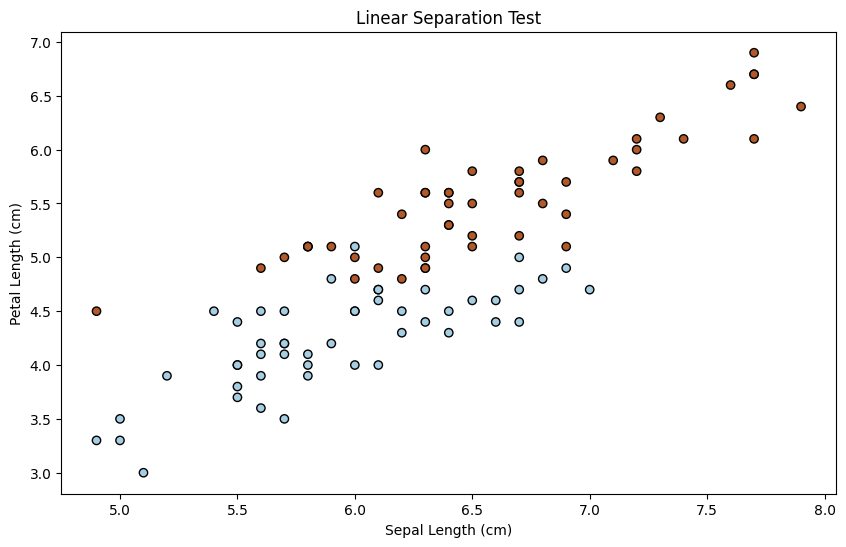

SVM Results with Different C Values:
          C  Training Error  Number of Support Vectors
      0.001            0.17                        100
      0.010            0.16                         92
      0.100            0.07                         56
      1.000            0.07                         31
     10.000            0.05                         18
    100.000            0.05                         14
   1000.000            0.05                         14
  10000.000            0.05                         14
 100000.000            0.06                         14
1000000.000            0.07                         13

Best C value: 10


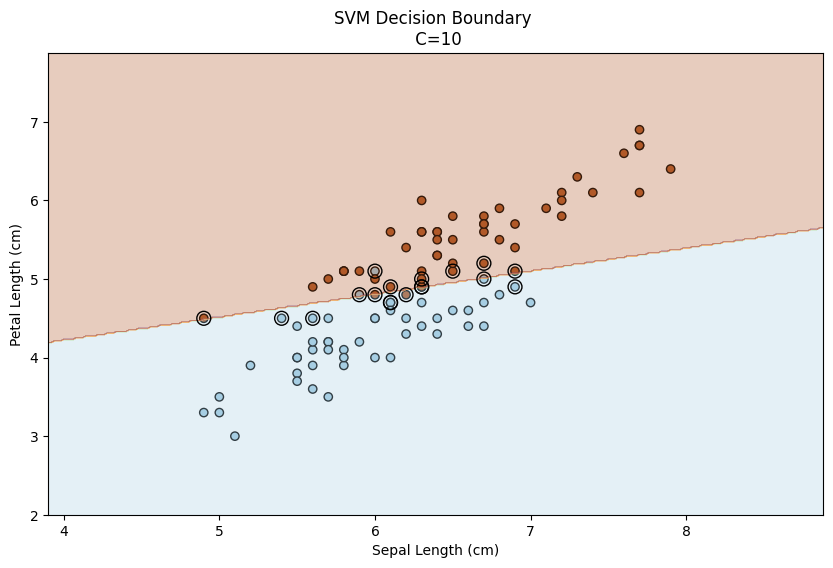


LaTeX Table for Results:
\begin{table}[h]
\centering
\begin{tabular}{ccc}
\toprule
C & Training Error & Number of Support Vectors \\
\midrule
0.001 & 0.1700 & 100 \\
0.01 & 0.1600 & 92 \\
0.1 & 0.0700 & 56 \\
1 & 0.0700 & 31 \\
10 & 0.0500 & 18 \\
100 & 0.0500 & 14 \\
1000 & 0.0500 & 14 \\
10000 & 0.0500 & 14 \\
100000 & 0.0600 & 14 \\
1000000 & 0.0700 & 13 \\
\bottomrule
\end{tabular}
\caption{SVM Results with Different C Values}
\label{tab:svm_results}
\end{table}


In [82]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import pandas as pd

# Load the Iris dataset
iris = datasets.load_iris()

# Extract features 0 (sepal length) and 2 (petal length)
X = iris.data[:, [0, 2]]  # Features: sepal length and petal length

# Extract labels 1 and 2 (versicolor and virginica)
# In the iris dataset, labels are 0, 1, 2 for setosa, versicolor, virginica
# So we need to filter for labels 1 and 2
mask = (iris.target == 1) | (iris.target == 2)
X = X[mask]
y = iris.target[mask]

# Remap labels to 0 and 1 for easier processing
# (original labels 1 -> 0, 2 -> 1)
y = y - 1

# Part 1: Check if the data is linearly separable
# We'll visualize the data to see if it can be separated by a straight line
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.title('Linear Separation Test')
plt.savefig('hw6_q8_a.png')
plt.show()

# Part 2: Train SVM with different C values
# C values to try (logarithmic scale)
C_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000]
results = []

for C in C_values:
    # Train SVM with linear kernel
    svm = SVC(kernel='linear', C=C)
    svm.fit(X, y)
    
    # Calculate training error
    y_pred = svm.predict(X)
    training_accuracy = accuracy_score(y, y_pred)
    training_error = 1 - training_accuracy
    
    # Get number of support vectors
    n_support_vectors = svm.n_support_.sum()
    
    # Store results
    results.append({
        'C': C,
        'Training Error': training_error,
        'Number of Support Vectors': n_support_vectors
    })

# Create a table of results
results_df = pd.DataFrame(results)
print("SVM Results with Different C Values:")
print(results_df.to_string(index=False))

# Part 3: Select the best C value and plot decision boundary
# For this example, we'll choose the C value with the lowest training error
# and reasonable number of support vectors
best_c_index = results_df['Training Error'].idxmin()
best_c = C_values[best_c_index]
print(f"\nBest C value: {best_c}")

# Train SVM with the best C value
best_svm = SVC(kernel='linear', C=best_c)
best_svm.fit(X, y)

# Plot the decision boundary
plt.figure(figsize=(10, 6))

# Plot the data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')

# Create a mesh grid to plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Get predictions for all points in the mesh
Z = best_svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)

# Plot the support vectors
plt.scatter(best_svm.support_vectors_[:, 0], best_svm.support_vectors_[:, 1],
            s=100, facecolors='none', edgecolors='k')

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.title(f'SVM Decision Boundary \n C={best_c}')
plt.savefig('svm_decision_boundary.png')
plt.show()

# Create a LaTeX table for the results
latex_table = "\\begin{table}[h]\n\\centering\n\\begin{tabular}{ccc}\n\\toprule\n"
latex_table += "C & Training Error & Number of Support Vectors \\\\\n\\midrule\n"

for result in results:
    latex_table += f"{result['C']} & {result['Training Error']:.4f} & {result['Number of Support Vectors']} \\\\\n"

latex_table += "\\bottomrule\n\\end{tabular}\n"
latex_table += "\\caption{SVM Results with Different C Values}\n\\label{tab:svm_results}\n\\end{table}"

print("\nLaTeX Table for Results:")
print(latex_table)


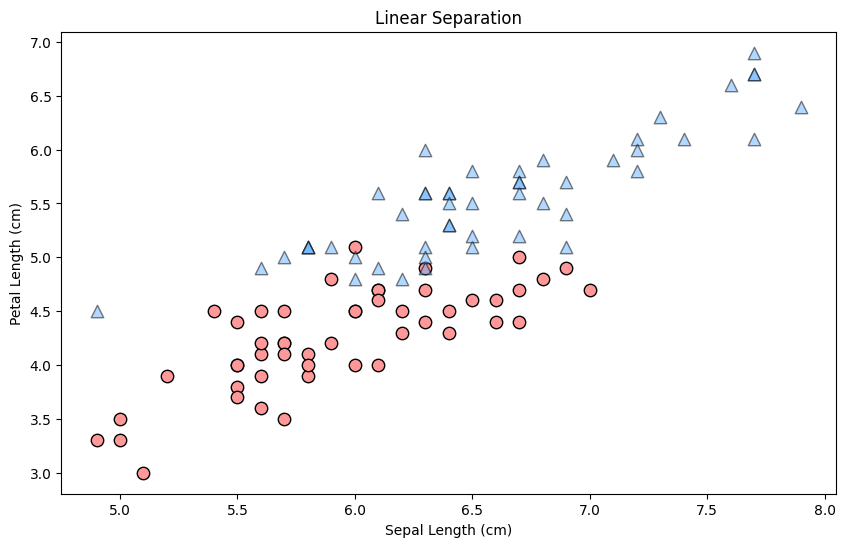

SVM Results with Different C Values:
          C  Training Error  Number of Support Vectors
      0.001            0.17                        100
      0.010            0.16                         92
      0.100            0.07                         56
      1.000            0.07                         31
     10.000            0.05                         18
    100.000            0.05                         14
   1000.000            0.05                         14
  10000.000            0.05                         14
 100000.000            0.06                         14
1000000.000            0.07                         13

Best C value: 10


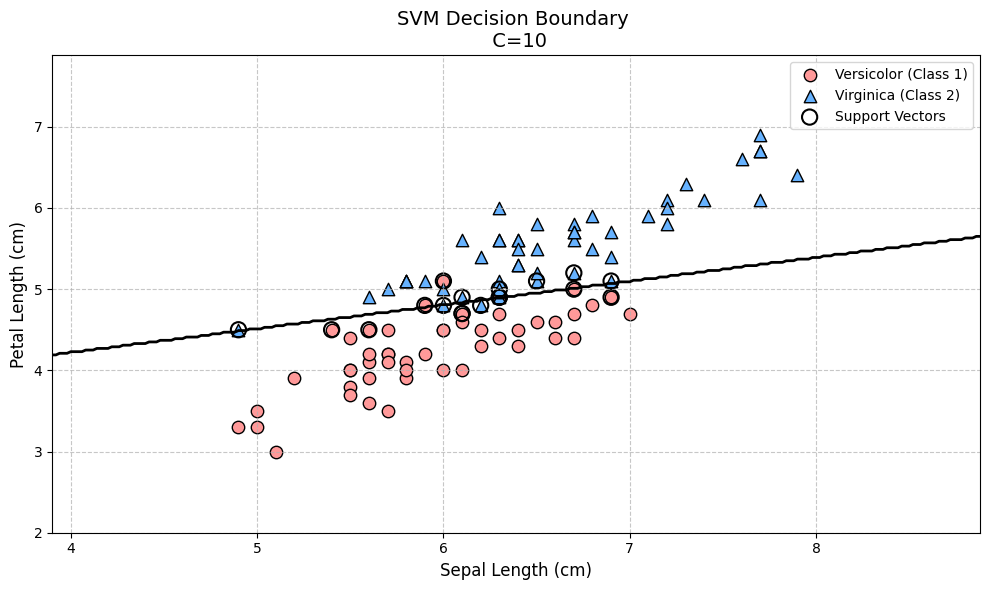


LaTeX Table for Results:
\begin{table}[h]
\centering
\begin{tabular}{ccc}
\toprule
C & Training Error & Number of Support Vectors \\
\midrule
0.001 & 0.1700 & 100 \\
0.01 & 0.1600 & 92 \\
0.1 & 0.0700 & 56 \\
1 & 0.0700 & 31 \\
10 & 0.0500 & 18 \\
100 & 0.0500 & 14 \\
1000 & 0.0500 & 14 \\
10000 & 0.0500 & 14 \\
100000 & 0.0600 & 14 \\
1000000 & 0.0700 & 13 \\
\bottomrule
\end{tabular}
\caption{SVM Results with Different C Values}
\label{tab:svm_results}
\end{table}


In [87]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import pandas as pd

# Load the Iris dataset
iris = datasets.load_iris()

# Extract features 0 (sepal length) and 2 (petal length)
X = iris.data[:, [0, 2]]  # Features: sepal length and petal length

# Extract labels 1 and 2 (versicolor and virginica)
# In the iris dataset, labels are 0, 1, 2 for setosa, versicolor, virginica
# So we need to filter for labels 1 and 2
mask = (iris.target == 1) | (iris.target == 2)
X = X[mask]
y = iris.target[mask]

# Remap labels to 0 and 1 for easier processing
# (original labels 1 -> 0, 2 -> 1)
y = y - 1

# Part 1: Check if the data is linearly separable
# We'll visualize the data to see if it can be separated by a straight line
plt.figure(figsize=(10, 6))
#plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
class0 = plt.scatter(X[y==0, 0], X[y==0, 1], c='#FF9999', marker='o', edgecolors='k', s=80, label='Versicolor (Class 1)')
class1 = plt.scatter(X[y==1, 0], X[y==1, 1], c='#66B2FF', marker='^', edgecolors='k', s=80,alpha=0.5, label='Virginica (Class 2)')

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.title('Linear Separation')
#plt.savefig('iris_data_visualization.png')
plt.show()

# Part 2: Train SVM with different C values
# C values to try (logarithmic scale)
C_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000]
results = []

for C in C_values:
    # Train SVM with linear kernel
    svm = SVC(kernel='linear', C=C)
    svm.fit(X, y)
    
    # Calculate training error
    y_pred = svm.predict(X)
    training_accuracy = accuracy_score(y, y_pred)
    training_error = 1 - training_accuracy
    
    # Get number of support vectors
    n_support_vectors = svm.n_support_.sum()
    
    # Store results
    results.append({
        'C': C,
        'Training Error': training_error,
        'Number of Support Vectors': n_support_vectors
    })

# Create a table of results
results_df = pd.DataFrame(results)
print("SVM Results with Different C Values:")
print(results_df.to_string(index=False))

# Part 3: Select the best C value and plot decision boundary
# For this example, we'll choose the C value with the lowest training error
# and reasonable number of support vectors
best_c_index = results_df['Training Error'].idxmin()
best_c = C_values[best_c_index]
print(f"\nBest C value: {best_c}")

# Train SVM with the best C value
best_svm = SVC(kernel='linear', C=best_c)
best_svm.fit(X, y)

# Plot the decision boundary with improved visualization
plt.figure(figsize=(10, 6))

# Create a mesh grid to plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Get predictions for all points in the mesh
Z = best_svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary without shading (only the boundary line)
plt.contour(xx, yy, Z, colors='k', levels=[0.5], linestyles=['-'], linewidths=2)

# Plot the data points with different markers for each class
class0 = plt.scatter(X[y==0, 0], X[y==0, 1], c='#FF9999', marker='o', edgecolors='k', s=80, label='Versicolor (Class 1)')
class1 = plt.scatter(X[y==1, 0], X[y==1, 1], c='#66B2FF', marker='^', edgecolors='k', s=80, label='Virginica (Class 2)')

# Plot the support vectors
sv = plt.scatter(best_svm.support_vectors_[:, 0], best_svm.support_vectors_[:, 1],
            s=120, facecolors='none', edgecolors='k', linewidths=1.5, label='Support Vectors')

plt.xlabel('Sepal Length (cm)', fontsize=12)
plt.ylabel('Petal Length (cm)', fontsize=12)
plt.title(f'SVM Decision Boundary \n C={best_c}', fontsize=14)

# Add legend
plt.legend(loc='upper right', fontsize=10)

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig('svm_decision_boundary.png', dpi=600)
plt.show()

# Create a LaTeX table for the results
latex_table = "\\begin{table}[h]\n\\centering\n\\begin{tabular}{ccc}\n\\toprule\n"
latex_table += "C & Training Error & Number of Support Vectors \\\\\n\\midrule\n"

for result in results:
    latex_table += f"{result['C']} & {result['Training Error']:.4f} & {result['Number of Support Vectors']} \\\\\n"

latex_table += "\\bottomrule\n\\end{tabular}\n"
latex_table += "\\caption{SVM Results with Different C Values}\n\\label{tab:svm_results}\n\\end{table}"

print("\nLaTeX Table for Results:")
print(latex_table)